In [1]:
version()

'SageMath version 9.4.beta0, Release Date: 2021-05-25'

In [2]:
%display latex

In [3]:
sin(x^2)

sin(x^2)

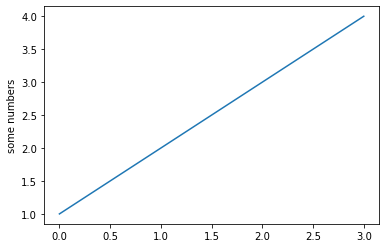

In [4]:
%display plain
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [5]:
s = sin(x^2)
s

sin(x^2)

In [6]:
view(s)

In [7]:
s._latex_()

'\\sin\\left(x^{2}\\right)'

In [8]:
class A(SageObject):

    def __init__(self, data):
        self._data = data

    def _repr_latex_(self):
        try:
            return '$' + self._data._latex_() + '$'
        except (AttributeError, NotImplementedError):  
            return None  # if None is returned, plain text is used

A(sin(x^2))

In [9]:
s = A(sin(x^2))

In [10]:
s

In [11]:
print(s)

In [12]:
[s, s, s]

In [13]:
g = plot(sin(x^2))
print(A(g))

In [14]:
s0 = A(None)
s0

## Issue with `%display latex` and `%matplotlib notebook`

In [15]:
%display latex
#%display plain

In [16]:
sin(x^2)

sin(x^2)

<IPython.core.display.Javascript object>


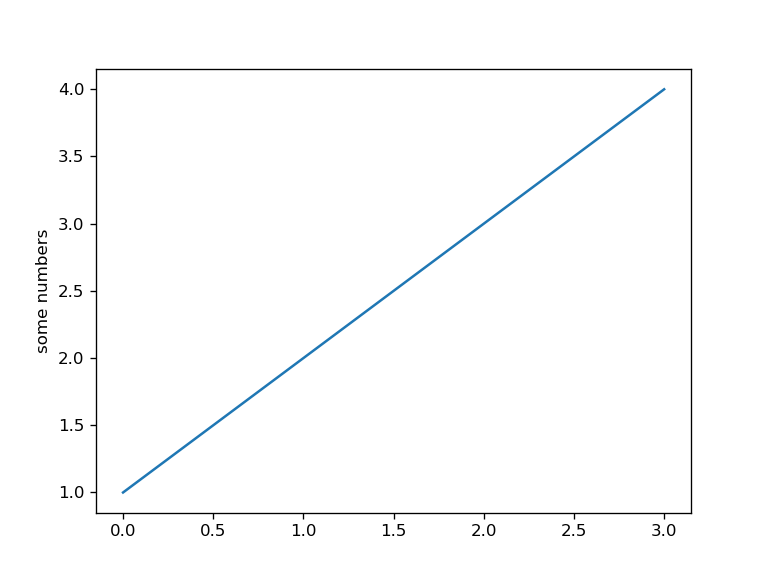

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [18]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f81962e3820> with 1 widget
  n: IntSlider(value=10, description='n', ma…

In [19]:
%display latex
sin(x^2)

sin(x^2)

In [20]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f81962e3e50> with 1 widget
  n: IntSlider(value=10, description='n', ma…